# Location Scouting for a Business close to Railway Stations (London)

## Introduction

We are accustomed to seeing stores and other forms of businesses in airports, be it duty free stores and restaurants/bars. Train stations on the other hand, do not have the space to have such establishments within the train station.

With some high-street stores across London announcing plans to open new branches in the immediate vicinity of transport hubs - particularly, railway stations, it is prudent to analyse the kinds of businesses operating in the area. This decision to expand to railway stations is partly as a result of increasing passenger journeys each year for the past 20 years. An analysis of most visited businesses close to railway stations will help some companies or individuals decide on how to take advantage of the yearly increase in passenger traffic.

Venues within 500 metres of the top 10 busiest railway stations in London will be explored

In [1]:
# pip install lxml

### Libraries

In [2]:
# import required libraries
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

# All requested packages already installed.

Libraries imported.


## Data 

The data for the top 10 busiest railway stations will be obtained from a wikipedia document that contains a complete list of the busiest railway stations in Great Britain. The top 10 railway stations are then pulled from the original list.

The venues and their various categories close to the railway stations will be obtained using Foursquare

In [3]:
# import table of the busiest railway stations in Great Britain 
gb = pd.read_html('https://en.wikipedia.org/wiki/List_of_busiest_railway_stations_in_Great_Britain')
gb = gb[0]

In [4]:
gb.head(5)

,Rank,Railway Station,Annual entries/exits(millions)2017–18,Annual interchanges (millions) 2017–18,Location,Main Services,Number of platforms,Interchange systems,Image
0,1,London Waterloo,94.345,5.859,London,South Western Main LineWest of England Main Line,24 (Platforms 25 and 26 are part of the Underg...,London Underground,NaN
1,2,London Victoria,74.955,6.126,London,Brighton Main LineChatham Main Line,19,London Underground,NaN
2,3,London Liverpool Street,66.967,3.790,London,Great Eastern Main LineWest Anglia Main Line,18,"London Underground, London Overground, TfL Rail",NaN
3,4,London Bridge,48.453,7.393,London,South Eastern Main LineBrighton Main LineThame...,15,London Underground,NaN
4,5,London Euston,44.746,4.073,London,West Coast Main Line,18,"London Underground, London Overground",NaN


In [5]:
# Selecting only railway stations in London 
lndn = gb[gb['Location'] == 'London'].reset_index(drop = True)
lndn.head()

,Rank,Railway Station,Annual entries/exits(millions)2017–18,Annual interchanges (millions) 2017–18,Location,Main Services,Number of platforms,Interchange systems,Image
0,1,London Waterloo,94.345,5.859,London,South Western Main LineWest of England Main Line,24 (Platforms 25 and 26 are part of the Underg...,London Underground,NaN
1,2,London Victoria,74.955,6.126,London,Brighton Main LineChatham Main Line,19,London Underground,NaN
2,3,London Liverpool Street,66.967,3.790,London,Great Eastern Main LineWest Anglia Main Line,18,"London Underground, London Overground, TfL Rail",NaN
3,4,London Bridge,48.453,7.393,London,South Eastern Main LineBrighton Main LineThame...,15,London Underground,NaN
4,5,London Euston,44.746,4.073,London,West Coast Main Line,18,"London Underground, London Overground",NaN


In [6]:
lndn_10 = lndn.iloc[0:10, 1:2]
lndn_10.iloc[5].replace({'Stratford': 'London Stratford'}, inplace = True)
lndn_10

,Railway Station
0,London Waterloo
1,London Victoria
2,London Liverpool Street
3,London Bridge
4,London Euston
5,London Stratford
6,London Paddington
7,London St Pancras
8,London King's Cross
9,Highbury and Islington


An empty dataframe is created to contain the coordinates of the railway stations. A function is  created to loop through the various railway stations for the coordinates, which is then added to the newly created dataframe.

In [7]:
# New dataframe for coordinates of the railway stations
cols = ['Latitude', 'Longitude']
coords = pd.DataFrame(columns = cols)
coords

,Latitude,Longitude


In [8]:
# Obtain the coordinates for each railway station 
for stat in zip(lndn_10['Railway Station']):
    address = '{}'.format(stat)
    geolocator = Nominatim(user_agent="lndn_explorer")
    location = geolocator.geocode(address)
    latitude = location.latitude
    longitude = location.longitude
    
    coords = coords.append({'Latitude': latitude,'Longitude': longitude}, ignore_index = True)

In [9]:
coords

,Latitude,Longitude
0,51.502838,-0.112801
1,51.494733,-0.144580
2,51.518043,-0.081773
3,51.508049,-0.087672
4,51.528808,-0.134255
5,51.541289,-0.003547
6,51.517086,-0.177542
7,51.532196,-0.127090
8,51.532395,-0.123022
9,51.546368,-0.103654


The table below shows the top ten busiest railway stations in London along with their coordinates.

In [10]:
# Complete table of the top ten busiest railway stations with coordinates
lndn_10 = pd.concat([lndn_10, coords], axis = 1)
lndn_10

,Railway Station,Latitude,Longitude
0,London Waterloo,51.502838,-0.112801
1,London Victoria,51.494733,-0.144580
2,London Liverpool Street,51.518043,-0.081773
3,London Bridge,51.508049,-0.087672
4,London Euston,51.528808,-0.134255
5,London Stratford,51.541289,-0.003547
6,London Paddington,51.517086,-0.177542
7,London St Pancras,51.532196,-0.127090
8,London King's Cross,51.532395,-0.123022
9,Highbury and Islington,51.546368,-0.103654


The getNearbyVenues function is used to loop through all railway stations and return a list of nearby venues for each station. The maximum number of venues for each railway station is set to 100.

In [11]:
CLIENT_ID = 'MZ2Y4YZZ11TT0HSYI22QO33YOLCPESO35GPHBNCRDEBLOEIP' # your Foursquare ID
CLIENT_SECRET = 'JMI523AA1LRZZODQITHEPTKWT5LY4S241LD4B4IVP5YO0VHH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MZ2Y4YZZ11TT0HSYI22QO33YOLCPESO35GPHBNCRDEBLOEIP
CLIENT_SECRET:JMI523AA1LRZZODQITHEPTKWT5LY4S241LD4B4IVP5YO0VHH


In [12]:
# Get a maximum of 100 nearby venues within 500 metres of the railway stations 
def getNearbyVenues(names, latitudes, longitudes, radius=500, LIMIT = 100):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Railway Station', 
                  'Railway Station Latitude', 
                  'Railway Station Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [13]:
top_10_venues = getNearbyVenues(names = lndn_10['Railway Station'],
                                   latitudes = lndn_10['Latitude'],
                                   longitudes = lndn_10['Longitude']
                                  )

London Waterloo
London Victoria
London Liverpool Street
London Bridge
London Euston
London Stratford
London Paddington
London St Pancras
London King's Cross
Highbury and Islington


The table below shows the first five rows of venues close to London Waterloo Station which includes the category and coordinates.  

In [14]:
top_10_venues.head()

,Railway Station,Railway Station Latitude,Railway Station Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,London Waterloo,51.502838,-0.112801,The Old Vic,51.502176,-0.109686,Theater
1,London Waterloo,51.502838,-0.112801,Greensmiths,51.500995,-0.112407,Food & Drink Shop
2,London Waterloo,51.502838,-0.112801,ODEON BFI IMAX,51.504995,-0.113529,Movie Theater
3,London Waterloo,51.502838,-0.112801,Vaulty Towers,51.501188,-0.111909,Bar
4,London Waterloo,51.502838,-0.112801,Po Cha,51.501035,-0.112213,Korean Restaurant


In [15]:
top_10_venues.reset_index(inplace = True)

In [16]:
print('Total number of venues within 500 meetres of the top 10 busiest railway stations in London: {}'.format(top_10_venues.shape[0]))

Total number of venues within 500 meetres of the top 10 busiest railway stations in London: 721


The total number of venues obtained from the function is 721. These venues will be explored and used in analysis.

## Methodology

To begin exploring each railway station's venues, the total number of venues returned for each railway station can be shown in the table below.

In [17]:
top_10_summary = top_10_venues.groupby('Railway Station').count().reset_index()

In [18]:
# Show total number of venues returned for each railway station
top_10_summary = top_10_summary[['Railway Station', 'Venue']]
top_10_summary.rename(columns = {'Venue': 'Venues'}, inplace = True)
top_10_summary.sort_values(by = 'Venues', inplace = True, ascending = False)
top_10_summary.reset_index(inplace = True)
top_10_summary.drop('index', axis=1, inplace = True)
top_10_summary

,Railway Station,Venues
0,London Victoria,100
1,London Waterloo,100
2,London Paddington,96
3,Highbury and Islington,74
4,London Stratford,74
5,London Bridge,70
6,London King's Cross,58
7,London St Pancras,58
8,London Liverpool Street,50
9,London Euston,41


The summary of total venues for each railway station shows London Waterloo and London Victoria having the most venues in close proximity and London Euston having the least venues.

The location of the railway stations is superimposed on a map of London.

In [19]:
address = 'London'

geolocator = Nominatim(user_agent="ldn_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of London are 51.5073219, -0.1276474.


In [20]:
# create map of New York using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=12)

# add markers to map
for lat, lng, station in zip(lndn_10['Latitude'], lndn_10['Longitude'], lndn_10['Railway Station']):
    label = '{}'.format(station)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london)  
    
map_london

The venue categories are grouped according to each station and the frequency of encountering each venue category at each station can be shown.

In [21]:
# one hot encoding
ldn_onehot = pd.get_dummies(top_10_venues[['Venue Category']], prefix="", prefix_sep="")

# add railway station column back to dataframe
ldn_onehot['Railway Station'] = top_10_venues['Railway Station'] 

# move railway station column to the first column
fixed_columns = [ldn_onehot.columns[-1]] + list(ldn_onehot.columns[:-1])
ldn_onehot = ldn_onehot[fixed_columns]

railway_grouped = ldn_onehot.groupby('Railway Station').sum().reset_index()
railway_grouped.head()

,Railway Station,Accessories Store,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Business Service,Café,Camera Store,Canal,Canal Lock,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Outdoor Sculpture,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Souvenir Shop,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Student Center,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Yoga Studio
0,Highbury and Islington,0,0,0,0,0,0,1,0,1,0,0,4,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,9,0,0,0,0,0,0,0,0,0,2,8,0,0,1,0,0,0,0,2,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,4,0,0,1,0,0,0,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,2,0,0,4,0,0,0,1,1,1,0,0,0,8,0,0,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0
1,London Bridge,0,0,0,0,0,0,0,0,1,0,1,3,1,0,0,1,1,0,0,0,1,0,0,0,2,2,0,0,1,0,0,0,0,1,1,1,0,0,1,5,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,2,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,2,0,1,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,5,3,0,0,0,0,1,1,0,4,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0
2,London Euston,0,1,0,0,0,1,0,0,0,0,0,0,0,0,3,0,1,0,0,0,2,0,0,0,1,0,0,0,2,0,0,0,0,0,1,1,0,0,1,2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,1,0,0,0,1,0,0,1,0,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,1,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0
3,London King's Cross,0,0,0,0,0,2,0,0,0,0,0,1,2,0,0,0,0,1,1,0,2,0,0,0,4,0,1,0,3,0,1,0,0,0,1,1,0,0,0,3,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,1,0,0,0,2,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,2,0,0,1,0,0,0,0,0,0,0
4,London Liverpool Str

In [22]:
# Group rows by railway station and taking the mean of the frequency of occurrence of each category
ldn_grouped = ldn_onehot.groupby('Railway Station').mean().reset_index()
ldn_grouped.head()

,Railway Station,Accessories Store,African Restaurant,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Australian Restaurant,BBQ Joint,Bakery,Bar,Bed & Breakfast,Beer Bar,Beer Store,Bistro,Bookstore,Boutique,Boxing Gym,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Stop,Business Service,Café,Camera Store,Canal,Canal Lock,Champagne Bar,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Colombian Restaurant,Concert Hall,Convenience Store,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Doner Restaurant,Donut Shop,Eastern European Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Event Space,Farmers Market,Fast Food Restaurant,Film Studio,Fish & Chips Shop,Flea Market,Food & Drink Shop,Food Court,Food Stand,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gastropub,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Harbor / Marina,Health Food Store,Himalayan Restaurant,Historic Site,History Museum,Hostel,Hotel,Hotel Bar,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Italian Restaurant,Japanese Restaurant,Juice Bar,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Malay Restaurant,Market,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Movie Theater,Museum,Music Venue,New American Restaurant,Outdoor Sculpture,Park,Pedestrian Plaza,Performing Arts Venue,Pharmacy,Pizza Place,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Pub,Restaurant,Roof Deck,Salad Place,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,Science Museum,Scottish Restaurant,Seafood Restaurant,Shopping Mall,Shopping Plaza,Skate Park,Souvenir Shop,Speakeasy,Sporting Goods Shop,Sports Bar,Stationery Store,Steakhouse,Street Art,Street Food Gathering,Student Center,Supermarket,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Toy / Game Store,Trail,Train Station,Tree,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Game Store,Video Store,Vietnamese Restaurant,Warehouse Store,Whisky Bar,Wine Bar,Yoga Studio
0,Highbury and Islington,0.0,0.00000,0.0,0.0,0.0,0.000000,0.013514,0.0,0.013514,0.0,0.000000,0.054054,0.013514,0.0,0.013514,0.000000,0.000000,0.000000,0.013514,0.00,0.013514,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.121622,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.027027,0.108108,0.00,0.0,0.013514,0.0,0.0,0.0,0.00000,0.027027,0.00,0.000000,0.0,0.0,0.000000,0.013514,0.013514,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.00,0.0,0.0,0.000000,0.000000,0.0,0.013514,0.013514,0.0,0.000000,0.013514,0.000000,0.000000,0.0,0.0,0.000000,0.00000,0.0,0.013514,0.000000,0.013514,0.0,0.0,0.00000,0.0,0.000000,0.0,0.000000,0.0,0.013514,0.000000,0.0,0.0,0.054054,0.0,0.0,0.013514,0.0,0.0,0.0,0.00000,0.0,0.013514,0.00000,0.000000,0.0,0.000000,0.00000,0.027027,0.00,0.0,0.000000,0.000000,0.0,0.000000,0.027027,0.00000,0.0,0.054054,0.000000,0.0,0.000000,0.013514,0.013514,0.013514,0.00,0.0,0.0,0.108108,0.000000,0.0,0.00,0.027027,0.0,0.000000,0.000000,0.0,0.013514,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.00,0.00000,0.000000,0.013514,0.0,0.000000,0.000000,0.0,0.013514,0.00000,0.0,0.000000,0.013514,0.0,0.013514,0.013514,0.0,0.0,0.013514,0.0,0.00,0.000000,0.0
1,London Bridge,0.0,0.00000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.014286,0.0,0.014286,0.042857,0.014286,0.0,0.000000,0.014286,0.014286,0.000000,0.000000,0.00,0.014286,0.0,0.0,0.0,0.028571,0.028571,0.000000,0.0,0.014286,0.0,0.000000,0.0,0.0,0.014286,0.014286,0.014286,0.0,0.0,0.014286,0.

With the mean of frequency of encountering the venue categories at each station shown above, a summary of the top 5 venues based on mean frequency is also shown in the table below. This information can be used as a decision factor when looking for a location for a business as it shows the top 5 most prevalent venue categories - in this instance, businesses-  found in close proximity to the railway stations 

In [23]:
# Top 5 venues by mean frequency for each railway station
num_top_venues = 5

for station in ldn_grouped['Railway Station']:
    print("----"+station+"----")
    temp = ldn_grouped[ldn_grouped['Railway Station'] == station].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----Highbury and Islington----
         venue  freq
0         Café  0.12
1          Pub  0.11
2  Coffee Shop  0.11
3         Park  0.05
4       Bakery  0.05


----London Bridge----
                venue  freq
0         Coffee Shop  0.07
1                 Pub  0.07
2  Seafood Restaurant  0.06
3  Italian Restaurant  0.04
4          Restaurant  0.04


----London Euston----
                venue  freq
0            Beer Bar  0.07
1                 Pub  0.07
2  Italian Restaurant  0.05
3              Museum  0.05
4         Coffee Shop  0.05


----London King's Cross----
            venue  freq
0    Burger Joint  0.07
1     Coffee Shop  0.05
2            Café  0.05
3           Hotel  0.05
4  Breakfast Spot  0.03


----London Liverpool Street----
                venue  freq
0          Food Truck  0.10
1               Hotel  0.06
2        Cocktail Bar  0.06
3  English Restaurant  0.06
4          Restaurant  0.04


----London Paddington----
                venue  freq
0               Hotel  0.20

Sorting the venues in descending order and showing the top 10 visited venues close to each railway station.

In [24]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [25]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Railway Station']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
station_venues_sorted = pd.DataFrame(columns=columns)
station_venues_sorted['Railway Station'] = ldn_grouped['Railway Station']

for ind in np.arange(ldn_grouped.shape[0]):
    station_venues_sorted.iloc[ind, 1:] = return_most_common_venues(ldn_grouped.iloc[ind, :], num_top_venues)

station_venues_sorted.head()

,Railway Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Highbury and Islington,Café,Coffee Shop,Pub,Park,Italian Restaurant,Bakery,Middle Eastern Restaurant,Deli / Bodega,Music Venue,Cocktail Bar
1,London Bridge,Coffee Shop,Pub,Seafood Restaurant,Bakery,Italian Restaurant,Restaurant,Burger Joint,Hotel,Fast Food Restaurant,Burrito Place
2,London Euston,Beer Bar,Pub,Museum,Breakfast Spot,Italian Restaurant,Café,Coffee Shop,Gym / Fitness Center,Theater,Sandwich Place
3,London King's Cross,Burger Joint,Café,Coffee Shop,Hotel,Train Station,Pub,Breakfast Spot,Supermarket,Bar,Pizza Place
4,London Liverpool Street,Food Truck,Cocktail Bar,Hotel,English Restaurant,Mediterranean Restaurant,Gym / Fitness Center,Coffee Shop,Boxing Gym,Restaurant,Salad Place


To get a broader view of the venues around the top ten railway stations, we can show a table and visualise the number of the top twenty (20) categories found in proximity of all the railway stations

In [26]:
# Total count of the top 20 venue categories
railway_grouped_count = pd.DataFrame(railway_grouped.T.sum(axis=1))
railway_grouped_count.drop('Railway Station', inplace = True)
railway_grouped_count.columns = ['Total Count']
railway_grouped_count.sort_values(by = 'Total Count', ascending = False, inplace = True)
top_venue_count = railway_grouped_count.head(20)
top_venue_count

,Total Count
Hotel,49
Coffee Shop,43
Café,40
Pub,37
Italian Restaurant,26
Bar,18
Burger Joint,17
Bakery,16
Sandwich Place,14
Restaurant,14


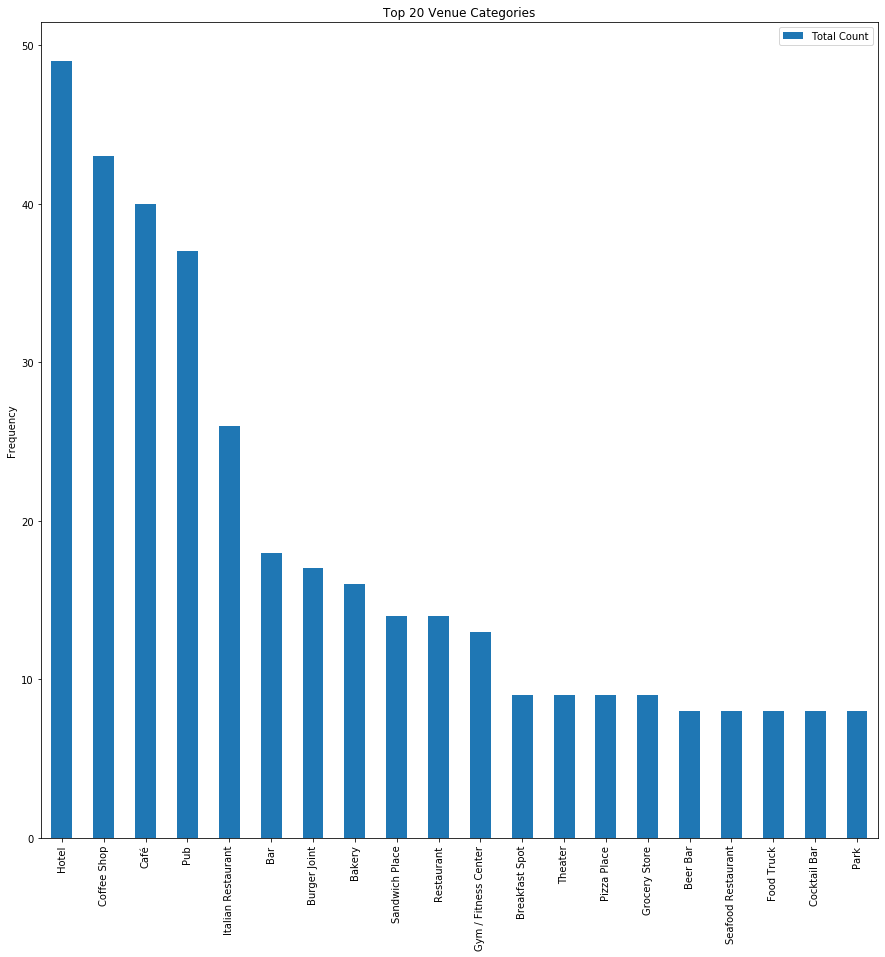

In [27]:
# Bar plot of the top 20 venue categories
top20_count_overall = railway_grouped_count.head(20)
top20_count_overall.plot(kind='bar',
                        figsize=(15,15),
                         title='Top 20 Venue Categories',
                       )

plt.ylabel('Frequency')

plt.show()

The number of each venue category for the top 20 categories for each railway station can be shown in the table below

In [28]:
#add line data to the categories data
station = lndn_10[['Railway Station']]
station

sort = railway_grouped.merge(station, on = 'Railway Station')

category_list = sort.groupby('Railway Station').sum()

top_venues = top_venue_count.index
station_venues = category_list[top_venues].reset_index()
station_venues

,Railway Station,Hotel,Coffee Shop,Café,Pub,Italian Restaurant,Bar,Burger Joint,Bakery,Sandwich Place,Restaurant,Gym / Fitness Center,Breakfast Spot,Theater,Pizza Place,Grocery Store,Beer Bar,Seafood Restaurant,Food Truck,Cocktail Bar,Park
0,Highbury and Islington,0,8,9,8,4,1,0,4,2,0,1,1,0,1,1,1,1,0,2,4
1,London Bridge,2,5,1,5,3,1,2,3,0,3,1,1,0,1,1,0,4,1,1,0
2,London Euston,1,2,2,3,2,0,1,0,1,0,2,2,2,0,0,3,0,0,1,0
3,London King's Cross,3,3,3,2,0,2,4,1,0,1,0,2,0,2,1,0,0,0,0,0
4,London Liverpool Street,3,2,1,1,1,0,1,0,1,2,2,0,0,1,0,0,1,5,3,0
5,London Paddington,19,5,14,4,5,1,0,1,2,0,1,0,0,1,4,1,1,1,0,1
6,London St Pancras,4,2,2,1,2,3,1,0,0,2,1,3,0,0,1,0,0,0,0,1
7,London Stratford,2,2,1,7,2,2,3,2,2,0,1,0,0,2,1,0,0,0,0,0
8,London Victoria,9,7,3,4,7,1,2,3,3,3,3,0,4,0,0,0,1,0,1,1
9,London Waterloo,6,7,4,2,0,7,3,2,3,3,1,0,3,1,0,3,0,1,0,1


The summary above provides a second tool with which decisions can be made as to where to locate a business close to any of the railway stations.

## Railway Station Clustering

K-means clustering is utilised to obtain 4 clusters 

In [29]:
# set number of clusters
kclusters = 4

railway_grouped_clustering = ldn_grouped.drop('Railway Station', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(railway_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([1, 1, 1, 3, 2, 0, 3, 1, 1, 1], dtype=int32)

A table is shohwn to include the clusters along with the top venues for each railway station

In [30]:
station_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

stations_merged = lndn_10

stations_merged = stations_merged.join(station_venues_sorted.set_index('Railway Station'), on = 'Railway Station')

stations_merged.head()

,Railway Station,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,London Waterloo,51.502838,-0.112801,1,Bar,Coffee Shop,Hotel,Café,Sandwich Place,Restaurant,Beer Bar,Theater,Burger Joint,Concert Hall
1,London Victoria,51.494733,-0.144580,1,Hotel,Italian Restaurant,Coffee Shop,Pub,Theater,Mediterranean Restaurant,Bakery,Café,Restaurant,Sandwich Place
2,London Liverpool Street,51.518043,-0.081773,2,Food Truck,Cocktail Bar,Hotel,English Restaurant,Mediterranean Restaurant,Gym / Fitness Center,Coffee Shop,Boxing Gym,Restaurant,Salad Place
3,London Bridge,51.508049,-0.087672,1,Coffee Shop,Pub,Seafood Restaurant,Bakery,Italian Restaurant,Restaurant,Burger Joint,Hotel,Fast Food Restaurant,Burrito Place
4,London Euston,51.528808,-0.134255,1,Beer Bar,Pub,Museum,Breakfast Spot,Italian Restaurant,Café,Coffee Shop,Gym / Fitness Center,Theater,Sandwich Place


In [31]:
# Map of clusters
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(stations_merged['Latitude'], stations_merged['Longitude'], stations_merged['Railway Station'], stations_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [32]:
stations_merged.loc[stations_merged['Cluster Labels'] == 0, stations_merged.columns[[0] + list(range(4, stations_merged.shape[1]))]]

,Railway Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
6,London Paddington,Hotel,Café,Italian Restaurant,Coffee Shop,Grocery Store,Pub,Greek Restaurant,Sandwich Place,Garden,Middle Eastern Restaurant


Common types of venues in Cluster 1 are hospitality, and recreational venues

In [33]:
stations_merged.loc[stations_merged['Cluster Labels'] == 1, stations_merged.columns[[0] + list(range(4, stations_merged.shape[1]))]]

,Railway Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,London Waterloo,Bar,Coffee Shop,Hotel,Café,Sandwich Place,Restaurant,Beer Bar,Theater,Burger Joint,Concert Hall
1,London Victoria,Hotel,Italian Restaurant,Coffee Shop,Pub,Theater,Mediterranean Restaurant,Bakery,Café,Restaurant,Sandwich Place
3,London Bridge,Coffee Shop,Pub,Seafood Restaurant,Bakery,Italian Restaurant,Restaurant,Burger Joint,Hotel,Fast Food Restaurant,Burrito Place
4,London Euston,Beer Bar,Pub,Museum,Breakfast Spot,Italian Restaurant,Café,Coffee Shop,Gym / Fitness Center,Theater,Sandwich Place
5,London Stratford,Pub,Clothing Store,Burger Joint,Toy / Game Store,Sandwich Place,Pizza Place,Cosmetics Shop,Department Store,Juice Bar,Italian Restaurant
9,Highbury and Islington,Café,Coffee Shop,Pub,Park,Italian Restaurant,Bakery,Middle Eastern Restaurant,Deli / Bodega,Music Venue,Cocktail Bar


Common types of venues in Cluster 2 are hospitality venues, receational venues, and stores

In [34]:
stations_merged.loc[stations_merged['Cluster Labels'] == 2, stations_merged.columns[[0] + list(range(4, stations_merged.shape[1]))]]

,Railway Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,London Liverpool Street,Food Truck,Cocktail Bar,Hotel,English Restaurant,Mediterranean Restaurant,Gym / Fitness Center,Coffee Shop,Boxing Gym,Restaurant,Salad Place


Cluster 3 mainly consists of hospitality, and fitness venues

In [35]:
stations_merged.loc[stations_merged['Cluster Labels'] == 3, stations_merged.columns[[0] + list(range(4, stations_merged.shape[1]))]]

,Railway Station,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,London St Pancras,Hotel,Breakfast Spot,Bar,Café,Coffee Shop,Chocolate Shop,Gastropub,Train Station,Restaurant,Italian Restaurant
8,London King's Cross,Burger Joint,Café,Coffee Shop,Hotel,Train Station,Pub,Breakfast Spot,Supermarket,Bar,Pizza Place


Cluster 4 consists of hospitality venues, stores, and transportation locations (train stations)

The clustering of these stations based on their similar characteristics might aid in selecting a location for a business. Any apparent opportunities close to any of the railway stations can be exploited. 